<a href="https://colab.research.google.com/github/francotestori/aauba_02/blob/master/Training_held_out_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentador de audios

In [15]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from pathlib import Path

In [19]:
def audio_segmenter(folder,Audiofile,digit):
    x, fs = librosa.core.load(f'{folder}/{Audiofile}.wav',sr=16000)
    #display(Audio(x,rate=fs))
    esx=7000
    split_points = librosa.effects.split(x,top_db=10)
    Path(f"{folder}/Segmentos_{digit}").mkdir(parents=True, exist_ok=True)
    for i,split in enumerate(split_points):
        xplot = np.zeros_like(x)
        xplot[split[0]-esx:split[1]+esx] = x[split[0]-esx:split[1]+esx]
        plt.plot(xplot)
        #display(Audio(x[split[0]-esx:split[1]+esx],rate=fs))
        sf.write(f'{folder}/Segmentos_{digit}/{Audiofile}_{i}.wav',x[split[0]-esx:split[1]+esx],fs)
    return x,fs

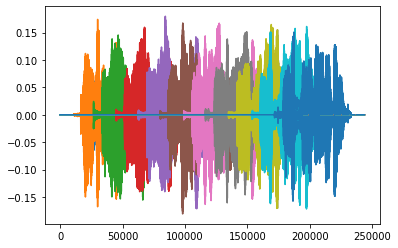

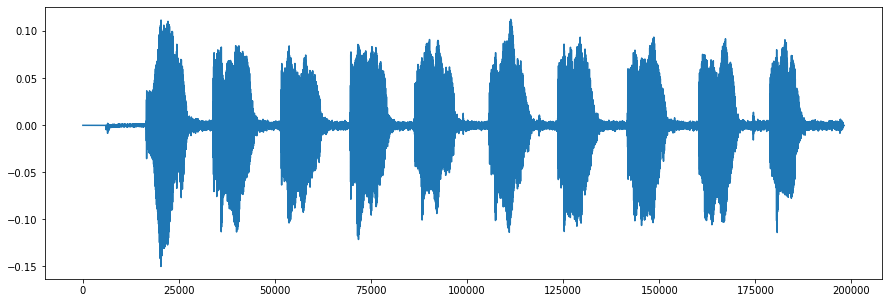

In [20]:
Audiofile = 'Audio2'
for k in range(10):
    x,fs = audio_segmenter('Caro',f'living_caro_{k}',k)
display(Audio(x,rate=fs))
plt.figure(figsize=(15,5))
plt.plot(x)

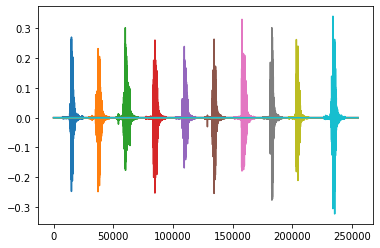